In [20]:
from datasets import load_dataset
import json
import csv
import ast
from tqdm import tqdm
import os
import torch
from PIL import Image
import glob
import cv2
import torchvision

In [2]:
prompts = {}

In [3]:
with open(
    "/home/aihao/workspace/DeepLearningContent/datasets/images/data/prompts.json", "r"
) as f:
    prompts = json.load(f)

In [4]:
prompts

{'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_栄光のガーディアンバトル,work illustration_45581208_p001.jpg': 'an anime character with long hair and a dress',
 'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_柳生十兵衛茜,鬼武者Soulコンテスト,鬼属性_27103411_p000.jpg': 'anime girl with long hair and sword in hand',
 "pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_照れ顔いろいろイメレス9!,kino,強力なカウンター,Kino's Journey,怪しいやつが一体いる,incredibly cute,キノの旅100users入り_23096464_p001.jpg": 'anime characters with different expressions',
 'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_柳生十兵衛茜,鬼武者Soulコンテスト,鬼属性_27103411_p001.jpg': 'a woman in red and black with a sword',
 'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_IA,VOCALOID,cute IA,beautiful,IA_-ARIA_ON_THE_PLANETES-,Vocaloid 1000+ bookmarks_43850917_p001.jpg': 'anime girl with long blonde hair and blue eyes',
 "pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_照れ顔いろいろイメレス9!,kino,強力なカウンター,Kino's Journey,怪しいやつが一体いる,incredibly cute,キノの

In [5]:
meta_data={}

In [6]:
for path, prompt in prompts.items():
    meta_data[path] = {}
    meta_data[path]["prompt"] = prompt

In [10]:
meta_data

{'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_栄光のガーディアンバトル,work illustration_45581208_p001.jpg': {'prompt': 'an anime character with long hair and a dress'},
 'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_柳生十兵衛茜,鬼武者Soulコンテスト,鬼属性_27103411_p000.jpg': {'prompt': 'anime girl with long hair and sword in hand'},
 "pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_照れ顔いろいろイメレス9!,kino,強力なカウンター,Kino's Journey,怪しいやつが一体いる,incredibly cute,キノの旅100users入り_23096464_p001.jpg": {'prompt': 'anime characters with different expressions'},
 'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_柳生十兵衛茜,鬼武者Soulコンテスト,鬼属性_27103411_p001.jpg': {'prompt': 'a woman in red and black with a sword'},
 'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_IA,VOCALOID,cute IA,beautiful,IA_-ARIA_ON_THE_PLANETES-,Vocaloid 1000+ bookmarks_43850917_p001.jpg': {'prompt': 'anime girl with long blonde hair and blue eyes'},
 "pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_照れ顔いろいろイメレス9!

In [10]:
for key in meta_data:
    meta_data[key]["similar_images"] = []

In [11]:
meta_data

{'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_栄光のガーディアンバトル,work illustration_45581208_p001.jpg': {'prompt': 'an anime character with long hair and a dress',
  'similar_images': []},
 'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_柳生十兵衛茜,鬼武者Soulコンテスト,鬼属性_27103411_p000.jpg': {'prompt': 'anime girl with long hair and sword in hand',
  'similar_images': []},
 "pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_照れ顔いろいろイメレス9!,kino,強力なカウンター,Kino's Journey,怪しいやつが一体いる,incredibly cute,キノの旅100users入り_23096464_p001.jpg": {'prompt': 'anime characters with different expressions',
  'similar_images': []},
 'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_柳生十兵衛茜,鬼武者Soulコンテスト,鬼属性_27103411_p001.jpg': {'prompt': 'a woman in red and black with a sword',
  'similar_images': []},
 'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_IA,VOCALOID,cute IA,beautiful,IA_-ARIA_ON_THE_PLANETES-,Vocaloid 1000+ bookmarks_43850917_p001.jpg': {'prompt': 'anime girl with long blon

In [12]:
with open(
    "/home/aihao/workspace/DeepLearningContent/datasets/images/data/similar_pairs.csv",
    "r",
) as f:
    for row in csv.reader(f):
        image_path1, image_path2, similarity = row
        meta_data[image_path1]["similar_images"].append([image_path2, similarity])

In [13]:
meta_data

{'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_栄光のガーディアンバトル,work illustration_45581208_p001.jpg': {'prompt': 'an anime character with long hair and a dress',
  'similar_images': [['pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_栄光のガーディアンバトル,work illustration_45581208_p000.jpg',
    '87.19966125488281']]},
 'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_柳生十兵衛茜,鬼武者Soulコンテスト,鬼属性_27103411_p000.jpg': {'prompt': 'anime girl with long hair and sword in hand',
  'similar_images': [['pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_柳生十兵衛茜,鬼武者Soulコンテスト,鬼属性_27103411_p001.jpg',
    '90.63825988769531']]},
 "pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_照れ顔いろいろイメレス9!,kino,強力なカウンター,Kino's Journey,怪しいやつが一体いる,incredibly cute,キノの旅100users入り_23096464_p001.jpg": {'prompt': 'anime characters with different expressions',
  'similar_images': [["pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_照れ顔いろいろイメレス9!,kino,強力なカウンター,Kino's Journey,怪しいやつが一体いる,incredib

In [14]:
meta_data[
    "pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_栄光のガーディアンバトル,work illustration_45581208_p001.jpg"
]

{'prompt': 'an anime character with long hair and a dress',
 'similar_images': [['pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_栄光のガーディアンバトル,work illustration_45581208_p000.jpg',
   '87.19966125488281']]}

In [15]:
with open(
    "/home/aihao/workspace/DeepLearningContent/datasets/images/data/meta_data.json", "w"
) as f:
    json.dump(meta_data, f,ensure_ascii=False)

In [16]:
test_meta_data={}

In [17]:
with open(
    "/home/aihao/workspace/DeepLearningContent/datasets/images/data/meta_data.json", "r"
) as f:
    test_meta_data = json.load(f)

In [18]:
test_meta_data

{'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_栄光のガーディアンバトル,work illustration_45581208_p001.jpg': {'prompt': 'an anime character with long hair and a dress',
  'similar_images': [['pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_栄光のガーディアンバトル,work illustration_45581208_p000.jpg',
    '87.19966125488281']]},
 'pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_柳生十兵衛茜,鬼武者Soulコンテスト,鬼属性_27103411_p000.jpg': {'prompt': 'anime girl with long hair and sword in hand',
  'similar_images': [['pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_柳生十兵衛茜,鬼武者Soulコンテスト,鬼属性_27103411_p001.jpg',
    '90.63825988769531']]},
 "pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_照れ顔いろいろイメレス9!,kino,強力なカウンター,Kino's Journey,怪しいやつが一体いる,incredibly cute,キノの旅100users入り_23096464_p001.jpg": {'prompt': 'anime characters with different expressions',
  'similar_images': [["pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_照れ顔いろいろイメレス9!,kino,強力なカウンター,Kino's Journey,怪しいやつが一体いる,incredib

In [19]:
test_meta_data[
    "pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_栄光のガーディアンバトル,work illustration_45581208_p001.jpg"
]

{'prompt': 'an anime character with long hair and a dress',
 'similar_images': [['pixiv/我美蘭@土曜日 西あ31a/Manga/_我美蘭@土曜日 西あ31a - pixiv__Manga_栄光のガーディアンバトル,work illustration_45581208_p000.jpg',
   '87.19966125488281']]}

In [2]:
# 生成线稿

In [9]:
image_path = "/home/aihao/workspace/DeepLearningContent/datasets/images/data/pixiv/torino/Illustration/_torino - pixiv__Illustration_Elizabeth Bathory,Fate／GrandOrder,FGO,dragon girl,ランサー(Fate／EXTRA-CCC),recommended,Fate／EXTRA10000users入り,Fate／GO 10000+ bookmarks_63083644_p000.png"

In [24]:
image = Image.open(image_path)

In [28]:
image

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=800x1257 at 0x7F6725755E90>


In [10]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

img_edge = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=5, C=7
)

img_edge

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [12]:
img_edge.shape

(1257, 800)

In [29]:
blueprint=Image.fromarray(img_edge).convert("RGB")

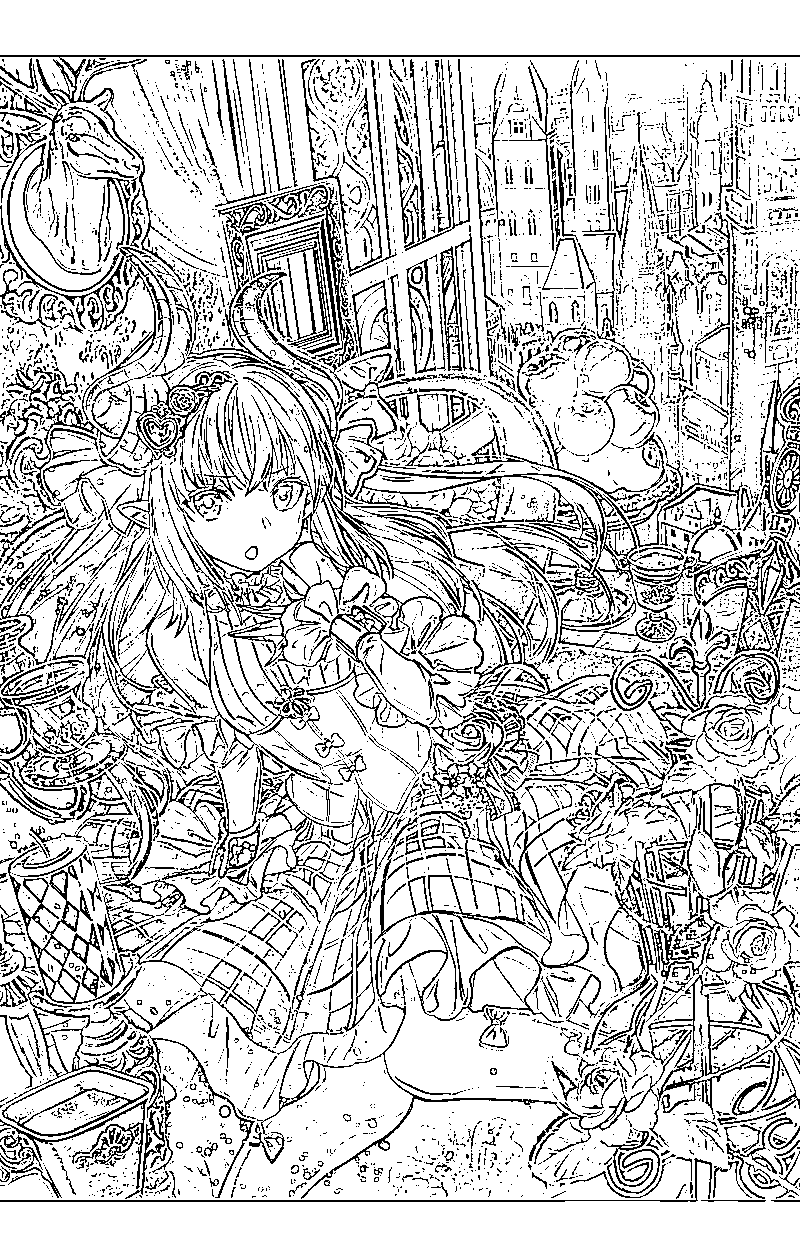

In [30]:
blueprint

In [31]:
blueprint.size

(800, 1257)

In [32]:
tensor = torchvision.transforms.ToTensor()(blueprint)

In [33]:
tensor.shape

torch.Size([3, 1257, 800])